# Polynomial Regression

## Importing the libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [4]:
dataset = pd.read_csv('Google-Playstore.csv', encoding= 'unicode_escape')

##Data Preprocessing

In [5]:
import re
def find_number(text):
    num = re.findall(r'[0-9]+',text)
    return " ".join(num)
dataset['Total Installs(+)']=dataset['Installs'].apply(lambda x: find_number(x))
dataset['MB']=dataset['Size'].apply(lambda x: find_number(x))

dataset.drop(columns = ['Installs','Size','Minimum Android'],axis=1,inplace=True)

column_names = ['Category','MB','Total Installs(+)','Rating Count','Rating']
dataset = dataset.reindex(columns=column_names)

dataset.dropna(inplace=True)
dataset['MB'] = dataset['MB'].str.replace(" ","")
dataset['Total Installs(+)'] = dataset['Total Installs(+)'].str.replace(" ","")
dataset['Rating Count'] = pd.to_numeric(dataset['Rating Count'])
dataset['Rating'] = pd.to_numeric(dataset['Rating'])

dataset['Total Installs(+)'] = dataset['Total Installs(+)'].astype(float)

dataset['MB'] = pd.to_numeric(dataset['MB'])

In [6]:
dataset = dataset[dataset.Rating != 0]

##Allocating features and result

In [7]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [8]:
print(X)

[['Tools' 29.0 5000.0 64.0]
 ['Communication' 18.0 10.0 5.0]
 ['Libraries & Demo' 25.0 1000.0 12.0]
 ...
 ['Education' 39.0 100.0 20.0]
 ['Puzzle' 52.0 10000.0 61.0]
 ['Simulation' nan 1000000.0 9443.0]]


In [9]:
print(y)

[4.4 5.  4.5 2.  4.7 4.9 3.9 3.7 4.2 3.4 5.  3.7 4.4 3.8 4.2 4.6 4.1 3.4
 3.4 2.5 2.3 3.7 2.1 4.9 5.  5.  2.7 4.3 3.8 4.4 3.1 3.8 4.7 4.3 4.1 4.7
 3.1 3.7 4.9 4.3 5.  3.9 4.8 3.3 4.9 2.7 4.  4.5 2.4 3.2 3.6 3.9 3.6 2.6
 2.6 3.3 4.6 4.2 4.3 5.  4.4 4.  3.4 5.  4.  4.4 4.3 4.8 5.  4.3 1.5 4.8
 4.2 3.7 4.1 4.  3.7 4.  3.5 2.9 4.  4.6 4.3 4.8 4.1 4.9 4.8 5.  4.9 4.5
 4.5 3.8 4.3 4.4 3.9 2.4 2.5 5.  4.2 4.1 4.6 2.4 3.6 4.6 3.9 4.4 3.7 3.9
 3.7 4.8 4.3 4.3 4.6 4.5 1.3 4.3 4.  3.9 2.1 5.  3.1 4.6 3.9 4.3 3.9 5.
 4.6 3.6 4.8 3.6 4.6 4.  4.7 4.2 4.5 3.2 3.4 4.3 5.  4.  4.4 4.1 5.  4.4
 4.5 4.1 2.8 3.8 3.8 4.4 3.5 3.7 4.  4.4 3.  3.9 4.1 3.8 3.1 4.  4.1 2.1
 3.9 4.6 5.  4.2 3.4 5.  4.  4.3 4.9 3.4 4.3 4.2 4.7 3.9 4.6 4.8 3.1 3.9
 2.6 2.9 4.9 2.2 2.  4.5 4.1 3.9 4.5 4.  3.8 3.2 5.  4.4 4.8 4.6 4.3 4.2
 4.  4.9 4.3 4.5 4.7 5.  4.1 4.  3.5 4.4 3.5 5.  3.3 4.8 4.4 4.8 4.  4.7
 4.3 4.  2.8 4.1 4.5 4.4 4.5 5.  4.3 5.  2.6 4.8 4.4 4.6 4.3 4.4 4.2 4.2
 5.  3.6 4.6 4.9 3.7 3.7 4.2 4.1 3.9 3.6 4.9 4.2 3.2

##Filling missing values by mean

In [10]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, 1:4])
X[:, 1:4] = imputer.transform(X[:, 1:4])

In [11]:
print(X)

[['Tools' 29.0 5000.0 64.0]
 ['Communication' 18.0 10.0 5.0]
 ['Libraries & Demo' 25.0 1000.0 12.0]
 ...
 ['Education' 39.0 100.0 20.0]
 ['Puzzle' 52.0 10000.0 61.0]
 ['Simulation' 47.92424242424242 1000000.0 9443.0]]


In [12]:
print(y)

[4.4 5.  4.5 2.  4.7 4.9 3.9 3.7 4.2 3.4 5.  3.7 4.4 3.8 4.2 4.6 4.1 3.4
 3.4 2.5 2.3 3.7 2.1 4.9 5.  5.  2.7 4.3 3.8 4.4 3.1 3.8 4.7 4.3 4.1 4.7
 3.1 3.7 4.9 4.3 5.  3.9 4.8 3.3 4.9 2.7 4.  4.5 2.4 3.2 3.6 3.9 3.6 2.6
 2.6 3.3 4.6 4.2 4.3 5.  4.4 4.  3.4 5.  4.  4.4 4.3 4.8 5.  4.3 1.5 4.8
 4.2 3.7 4.1 4.  3.7 4.  3.5 2.9 4.  4.6 4.3 4.8 4.1 4.9 4.8 5.  4.9 4.5
 4.5 3.8 4.3 4.4 3.9 2.4 2.5 5.  4.2 4.1 4.6 2.4 3.6 4.6 3.9 4.4 3.7 3.9
 3.7 4.8 4.3 4.3 4.6 4.5 1.3 4.3 4.  3.9 2.1 5.  3.1 4.6 3.9 4.3 3.9 5.
 4.6 3.6 4.8 3.6 4.6 4.  4.7 4.2 4.5 3.2 3.4 4.3 5.  4.  4.4 4.1 5.  4.4
 4.5 4.1 2.8 3.8 3.8 4.4 3.5 3.7 4.  4.4 3.  3.9 4.1 3.8 3.1 4.  4.1 2.1
 3.9 4.6 5.  4.2 3.4 5.  4.  4.3 4.9 3.4 4.3 4.2 4.7 3.9 4.6 4.8 3.1 3.9
 2.6 2.9 4.9 2.2 2.  4.5 4.1 3.9 4.5 4.  3.8 3.2 5.  4.4 4.8 4.6 4.3 4.2
 4.  4.9 4.3 4.5 4.7 5.  4.1 4.  3.5 4.4 3.5 5.  3.3 4.8 4.4 4.8 4.  4.7
 4.3 4.  2.8 4.1 4.5 4.4 4.5 5.  4.3 5.  2.6 4.8 4.4 4.6 4.3 4.4 4.2 4.2
 5.  3.6 4.6 4.9 3.7 3.7 4.2 4.1 3.9 3.6 4.9 4.2 3.2

##Encoding categorical variables

In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(sparse=False), [0])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [14]:
print(X)

[[0.0 0.0 0.0 ... 29.0 5000.0 64.0]
 [0.0 0.0 0.0 ... 18.0 10.0 5.0]
 [0.0 0.0 0.0 ... 25.0 1000.0 12.0]
 ...
 [0.0 0.0 0.0 ... 39.0 100.0 20.0]
 [0.0 0.0 0.0 ... 52.0 10000.0 61.0]
 [0.0 0.0 0.0 ... 47.92424242424242 1000000.0 9443.0]]


## Splitting the dataset into the Training set and Test set

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [16]:
print(X_train)

[[0.0 0.0 0.0 ... 66.0 100.0 7.0]
 [0.0 0.0 0.0 ... 127.0 1000.0 7.0]
 [0.0 0.0 0.0 ... 20.0 10000.0 54.0]
 ...
 [0.0 0.0 0.0 ... 19.0 1000.0 29.0]
 [0.0 0.0 0.0 ... 11.0 100000.0 1592.0]
 [0.0 0.0 0.0 ... 12.0 500.0 6.0]]


## Training the Polynomial Regression model on the whole dataset

In [17]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X)
X_poly_test = poly_reg.fit_transform(X_test)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

##Model Evaluation by r2_score

In [19]:
from sklearn.metrics import r2_score
prediction = lin_reg_2.predict(X_poly_test)
r2_score(prediction,y_test)

0.24180098210033873

##Model Evaluation by Root Mean Squared Error(RMSE)

In [20]:
from sklearn.metrics import mean_squared_error
prediction = lin_reg_2.predict(X_poly_test)
mean_squared_error(prediction,y_test,squared=True)

0.2406581125057601

##Model Evaluation by Mean Squared Error(MSE)

In [21]:
from sklearn.metrics import mean_squared_error
prediction = lin_reg_2.predict(X_poly_test)
mean_squared_error(prediction,y_test,squared=False)

0.49056917198878297

##Model Evaluation by Mean Absolute Error(MAE)

In [22]:
from sklearn.metrics import mean_absolute_error
prediction = lin_reg_2.predict(X_poly_test)
mean_absolute_error(prediction,y_test)

0.33857943995704426

## Visualising the Polynomial Regression results

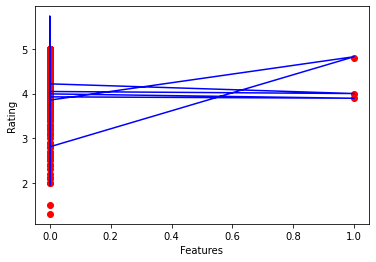

In [23]:
plt.scatter(X[:,0], y, color = 'red')
plt.plot(X[:,0], lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.xlabel('Features')
plt.ylabel('Rating')
plt.show()